In [1]:
import os
import torch
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
train_data_location = '/dataset/korean_unsmile_dataset/unsmile_train_v1.0.tsv'
test_data_location = '/dataset/korean_unsmile_dataset/unsmile_valid_v1.0.tsv'
base_dir = os.getcwd()
train_df = pd.read_csv(base_dir + train_data_location, sep='\t')
test_df = pd.read_csv(base_dir + test_data_location, sep='\t')
pd.set_option('display.max_colwidth', None)
pd.set_option('display.max_rows', 100)
train_df.head(5)

,문장,여성/가족,남성,성소수자,인종/국적,연령,지역,종교,기타 혐오,악플/욕설,clean,개인지칭
0,일안하는 시간은 쉬고싶어서 그런게 아닐까,0,0,0,0,0,0,0,0,0,1,0
1,아동성범죄와 페도버는 기록바 끊어져 영원히 고통 받는다. 무슬림 50퍼 근친이다. 10 16까지 IQ 떨어지고 출산 위험은 400% 다.,0,0,0,0,0,0,1,0,0,0,0
2,"루나 솔로앨범 나왔을 때부터 머모 기운 있었음 ㅇㅇ Keep o doin 진짜 띵곡임 꼭 들어보셈""",0,0,0,0,0,0,0,0,0,1,0
3,홍팍에도 어버이연합인가 보내요 뭐 이런뎃글 있는데 이거 어버이연합측에 신고하면 그쪽에서 고소 가능하냐?,0,0,0,0,0,0,0,0,0,1,0
4,아놔 왜 여기 댓들은 다 여자들이 김치녀라고 먼저 불렸다! 여자들은 더 심하게 그런다! 이렇게 2개로 싸우냐.. 내가 볼 땐 둘다 나쁜 말 그 이상도 이하도 아닌데,1,0,0,0,0,0,0,0,0,0,0


In [4]:
# 훈련/테스트 데이터 개수
train_num = len(train_df)
test_num = len(test_df)
print(f'total train data: {train_num}\ntotal test data: {test_num}')

total train data: 15005
total test data: 3737


In [5]:
# 훈련 데이터 레이블 값 분포
# one hot label 이 가장 많음
arr = []
for i in range(len(train_df)):
  data = train_df.iloc[i]
  arr.append(np.sum(data[1:].to_numpy()))
arr = np.array(arr)

a = len(train_df.iloc[arr > 1])
b = len(train_df.iloc[arr == 1])
c = len(train_df.iloc[arr < 1]) # 결측치

print('-train data')
print(f'multi hot labeled data: {a}')
print(f'one hot labeled data: {b}')
print(f'data with no lable: {c}')
print(f'sum: {a + b + c}\n')


# 테스트 데이터 레이블 값 분포
# 테스트 데이터 또한 one hot label 이 가장 많음
sum = []
for i in range(len(test_df)):
  data = test_df.iloc[i]
  sum.append(np.sum(data[1:].to_numpy()))
sum = np.array(sum)

a = len(test_df.iloc[sum > 1])
b = len(test_df.iloc[sum == 1])
c = len(test_df.iloc[sum < 1])
print('-test data')
print(f'multi hot labeled data: {a}')
print(f'one hot labeled data: {b}')
print(f'data with no lable: {c}')
print(f'sum: {a + b + c}')

-train data
multi hot labeled data: 1280
one hot labeled data: 13723
data with no lable: 2
sum: 15005

-test data
multi hot labeled data: 306
one hot labeled data: 3431
data with no lable: 0
sum: 3737


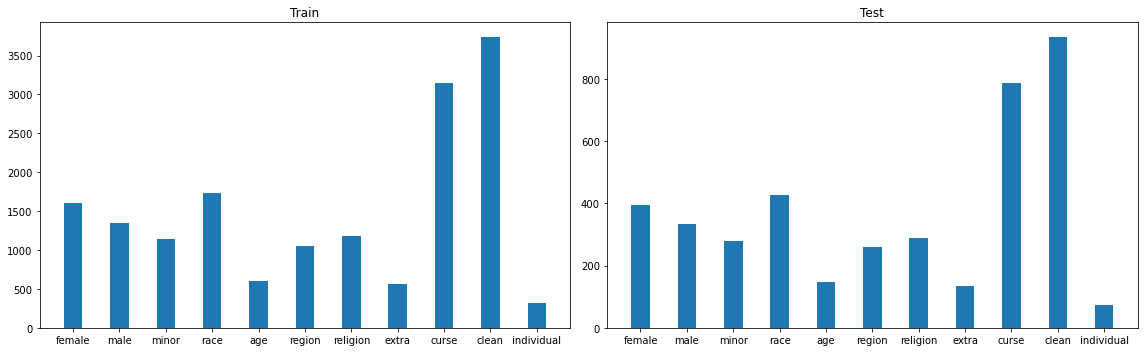

-train
여성/가족   남성   성소수자   인종/국적   연령   지역   종교   기타 혐오   악플/욕설   clean   개인지칭   
1599    1347    1141    1728    603    1052    1181    569    3143    3739    315    
-test
여성/가족   남성   성소수자   인종/국적   연령   지역   종교   기타 혐오   악플/욕설   clean   개인지칭   
394     334     280     426     146     260     290     134     786     935     74     

In [6]:
# train 데이터 카테고리별 합: unsmile dataset github README 에 나와있는 수치
categories = ['female', 'male', 'minor', 'race', 'age', 'region', 'religion', 'extra', 'curse', 'clean', 'individual']

train_sum = train_df.sum()[1:]
x1 = range(1, 2 * len(train_sum), 2)
y1 = train_sum

test_sum = test_df.sum()[1:]
x2 = range(1, 2 * len(test_sum), 2)
y2 = test_sum

plt.figure(figsize=(16, 5))
plt.subplot(1, 2, 1)
plt.bar(x1, y1)
plt.title('Train')
plt.xticks(x1, categories)

plt.subplot(1, 2, 2)
plt.bar(x2, y2)
plt.title('Test')
plt.xticks(x2, categories)

plt.tight_layout()
plt.show()

print('-train')
for i in y1.index:
  print(f'{i}   ', end='')
print()
for i in y1:
  print(f'{i}    ', end='')

print()

print('-test')
for i in y2.index:
  print(f'{i}   ', end='')
print()
for i in y2:
  print(f'{i}     ', end='')

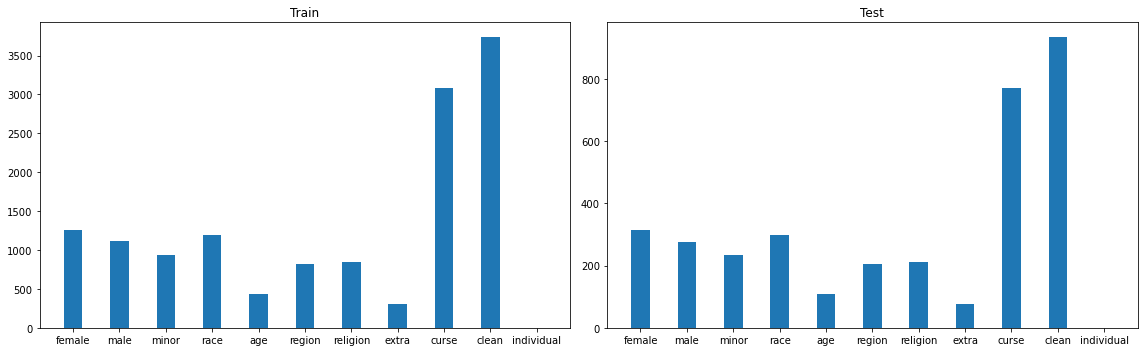

-train
여성/가족    남성    성소수자    인종/국적    연령    지역    종교    기타 혐오    악플/욕설    clean    개인지칭    
1251     1110     936     1190     430     823     845     310     3089     3739     0     
-test
여성/가족   남성   성소수자   인종/국적   연령   지역   종교   기타 혐오   악플/욕설   clean   개인지칭   
313     277     234     298     108     206     211     77     772     935     0     

In [7]:
# one hot labeled 데이터 중, 카테고리별 합
# 즉, 특정 카테고리 하나에만 속하는 데이터들을 선택하고, 거기서 카테고리별 합을 구함 
categories = ['female', 'male', 'minor', 'race', 'age', 'region', 'religion', 'extra', 'curse', 'clean', 'individual']

# train data
train_indexes = []
for i in range(len(train_df)):
  data = train_df.iloc[i]
  if data[1:].sum() == 1:
    train_indexes.append(i)
    
train_sum = train_df.iloc[train_indexes].sum()[1:]
x1 = range(1, 2 * len(train_sum), 2)
y1 = train_sum

# test data
test_indexes = []
for i in range(len(test_df)):
  data = test_df.iloc[i]
  if data[1:].sum() == 1:
    test_indexes.append(i)

test_sum = test_df.iloc[test_indexes].sum()[1:]
x2 = range(1, 2 * len(test_sum), 2)
y2 = test_sum

plt.figure(figsize=(16, 5))
plt.subplot(1, 2, 1)
plt.bar(x1, y1)
plt.title('Train')
plt.xticks(x1, categories)

plt.subplot(1, 2, 2)
plt.bar(x2, y2)
plt.title('Test')
plt.xticks(x2, categories)

plt.tight_layout()
plt.show()

print('-train')
for i in y1.index:
  print(f'{i}    ', end='')
print()
for i in y1:
  print(f'{i}     ', end='')

print()

print('-test')
for i in y2.index:
  print(f'{i}   ', end='')
print()
for i in y2:
  print(f'{i}     ', end='')

# 결과를 보면 '개인지칭' 카테고리만 1 인 데이터는 없음을 확인할 수 있다.
# 즉, 개인을 향한 'clean' 한 데이터는 없으며, 전부 혐오표현를 동반한다.

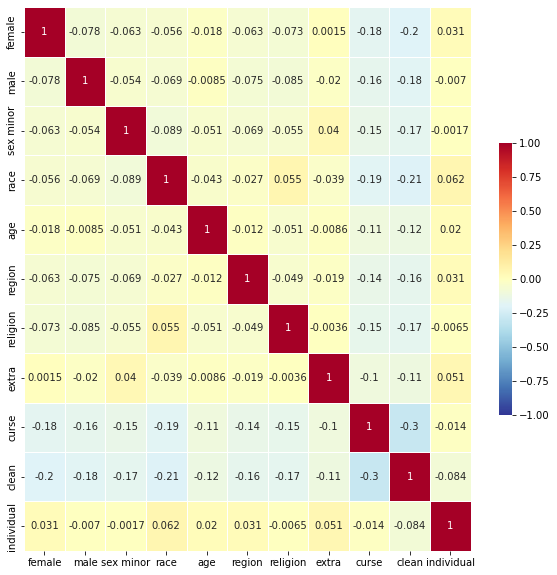

In [8]:
# 카테고리들 간의 상관계수
column_df = train_df.drop(columns='문장', axis=1)
column_df.columns = ['female', 'male', 'sex minor', 'race', 'age', 'region', 'religion', 'extra', 'curse', 'clean', 'individual']

corr_df = column_df.corr()
fig, ax = plt.subplots(figsize=(10, 10))

sns.heatmap(corr_df, 
            cmap = 'RdYlBu_r', 
            annot = True,   # 실제 값을 표시한다
            linewidths=.5,  # 경계면 실선으로 구분하기
            cbar_kws={"shrink": .5},# 컬러바 크기 절반으로 줄이기
            vmin = -1,vmax = 1   # 컬러바 범위 -1 ~ 1
           )
plt.show()

### '악플/욕설'과 다른 혐오 카테고리들과의 상관계수가 음수인 이유?
인터넷 상의 혐오 표현들은 주로 악플이나 욕설과 동반되므로, '악플/욕설' 카테고리와 다른 혐오 카테고리들은
양의 상관관계를 가질 것이라고 예상했으나, heatmap 을 보면 그렇지 않다. 전부 음의 상관관계를 가지고 있으며,
심지어 'clean' 의 상관 계수와 비슷한 패턴을 가진다.(색깔이 비슷함!)

In [9]:
indexes = []
for i in range(column_df.shape[0]):
    data = column_df.iloc[i]
    if data.curse == 1:
        indexes.append(i)
        
column_df.iloc[indexes].sum()

female           0
male             0
sex minor        0
race             0
age              0
region           0
religion         0
extra            0
curse         3143
clean            0
individual      54
dtype: int64

In [10]:
indexes = []
for i in range(column_df.shape[0]):
    data = column_df.iloc[i]
    if data.clean == 1:
        indexes.append(i)
        
column_df.iloc[indexes].sum()

female           0
male             0
sex minor        0
race             0
age              0
region           0
religion         0
extra            0
curse            0
clean         3739
individual       0
dtype: int64

통계를 내보면 우선 'clean' 데이터는 전부 one hot 이기 때문에 다른 혐오 카테고리들과 음의 상관관계를 가지게 되는 것이다.
그리고 '악플/욕설' 데이터도 대부분 one hot 이다. (3143개 중에 무려 3089개가 one hot 임) 따라서 'clean' 데이터와 유사한 상관계수를 가진다.
'악플/욕설' 데이터는 특정 대상에 대한 혐오 표현이 아니라 순수(?) 나쁜 말들만 모아 둔 것으로 예상할 수 있다.
추가적으로, '악플/욕설' 데이터 중 54개가 '개인지칭' 과 쓰였음을 알 수 있고, 따라서 heatmap 을 보면 '개인지칭' 과의 상관계수가 가장 크다.

### 그렇다면 다른 혐오 카테고리와의 양의 상관관계가 가장 큰 카테고리는 뭘까?
'개인지칭' 이 가장 높으며, 데이터를 보면 많은 혐오 표현들이 개인을 대상으로 쓰였음을 알 수 있다.

(모델이 '개인지칭' 을 1로 올바르게 예측한 데이터와, 0으로 잘못 예측한 데이터 둘 다, 안에 개인이 포함되어 있었다.
'개인지칭' 데이터 자체에 문제가 있는 것은 아니지만 recall 이 꼴지인 것을 보면, 데이터 수가 너무 작아서 모델이 학습을 잘 못한 것 같다.)

In [11]:
column_df.corr().sum().sort_values()

clean        -0.692707
curse        -0.482342
male          0.261233
female        0.304439
sex minor     0.345209
race          0.401268
religion      0.413182
region        0.416728
age           0.604220
extra         0.786978
individual    1.081564
dtype: float64

In [12]:
indexes = []
for i in range(column_df.shape[0]):
    data = column_df.iloc[i]
    if data.individual == 1:
        indexes.append(i)
        
column_df.iloc[indexes].sum()

female         54
male           24
sex minor      23
race           79
age            21
region         39
religion       21
extra          33
curse          54
clean           0
individual    315
dtype: int64

### '악플/욕설'은 대부분 one hot label 이다. 실제로 어떤 문장들인지 살펴보자

전반적으론 분류를 잘한 것 같지만, 왜 악플/욕설 인지 잘 모르겠는 몇몇 문장들도 존재한다.

'악플/욕설' 의 recall 은 45% 이며, 총 카테고리 중 세번째로 낮다. 데이터 클리닝을 하면 성능이 올라갈까?

(모델을 돌려보았을 때, '개인지칭' -> '기타 혐오' -> '악플/욕설' 순으로 recall 이 낮았다.)

In [19]:
train_df.columns = ['sentence', 'female', 'male', 'sex minor', 'race', 'age', 'region', 'religion', 'extra', 'curse', 'clean', 'individual']
indexes = []

for i in range(len(train_df)):
    data = train_df.iloc[i]
    if data.curse == 1 and data.individual == 0:
        indexes.append(i)

curse_df = train_df.iloc[indexes]
print(len(curse_df))
curse_df.sentence
curse_df.head(30)
# curse_df.loc[106].sentence

# 악플, 욕설인지 애매한 문장들 예시
# 아직까지 제네들을 고용하고 있어야할 이유가 뭐냐?
# 말은 맞는말인데 니가하니까 별로다
# 이건 볼때마다 개웃김ㅋㅋㅋㅋ
# 내전 나겠네 ㅋㅋ 팝콘 사놔라
# 이것도 기사냐
# 띄울사람이 진짜 없긴 없나보다
# 보석 같아서 아껴서 꽁꽁깜춘다는데 여자가 돌맹이냐 사람이지 보석이면 더 보여주면서 자랑하고 싶지 않냐 왜 눈만 보여줘
# 가정환경이 도대체 어때야만 감형없이 제대로된 처벌을 할까?? 불우하고 폭력적이 환경에서 자라면 지자식 때려죽여도 된다는 법이 따로 있는거임???


3089


,sentence,female,male,sex minor,race,age,region,religion,extra,curse,clean,individual
7,나이쳐먹고 피시방가는 놈들은 대가리에 똥만찬 놈들임,0,0,0,0,0,0,0,0,1,0,0
17,위로와 격려를 호텔에서 해? 왜? 저여자도 정상은 아니구만 완전 지네 할아버지보다 나이가 더 많을듯한데 토나올꺼같은데.. 둘다 미쳤구만.. 그렇게 더러운짓은 하고 설교를 어떻게 하는거야.. 웩!,0,0,0,0,0,0,0,0,1,0,0
19,띄울사람이 진짜 없긴 없나보다,0,0,0,0,0,0,0,0,1,0,0
22,쑈 빼고 아무것도 없는 개돼지 정권이노 탄핵 개힘조,0,0,0,0,0,0,0,0,1,0,0
27,뭐하냐 기업이네 기업이여 기업에 돈갖다 받치는 어이없는 시키들도 문제다,0,0,0,0,0,0,0,0,1,0,0
34,뜬구름 잡는 소리 하고 있네.,0,0,0,0,0,0,0,0,1,0,0
36,도대체 이정권에서 무고한목숨이 얼마나죽는가,0,0,0,0,0,0,0,0,1,0,0
49,솔직히 패 죽일 수 있다 정당방위 상황에서 어디를 어떻게 쳐서 병신 만들지 시뮬레이션 많이 해보노,0,0,0,0,0,0,0,0,1,0,0
50,저남자랑 섹스하고싶다 쎅스쌕스!!,0,0,0,0,0,0,0,0,1,0,0
60,보지는 돈 벌어서 좋고꼬추는 섹스해서 좋고서로 윈윈인데 이게 왜 불법이냐,0,0,0,0,0,0,0,0,1,0,0


### '기타 혐오' 데이터 분석
대학, 장애인, 정부, 차별금지법 등 추가적인 대상에 대한 혐오표현

In [16]:
indexes = []

for i in range(len(train_df)):
    data = train_df.iloc[i]
    if data.extra == 1:
        indexes.append(i)

extra_df = train_df.iloc[indexes]
print(f'total extra data:', len(extra_df))

indexes2 = []
for i in range(len(train_df)):
    data = train_df.iloc[i]
    if data.extra == 1 and data[1:].sum() == 1:
        indexes2.append(i)
print(f'one hot extra data: ', len(indexes2))

train_df.iloc[indexes2].head(30)

total extra data: 569
one hot extra data:  310


,sentence,female,male,sex minor,race,age,region,religion,extra,curse,clean,individual
126,포괄적차별금지법을 반대합니다.,0,0,0,0,0,0,0,1,0,0,0
256,"적화 다 된거냐?ㅋㅋㅋㅋㅋㅋ 기가 차다, 빨갱이들이 많긴 많은 가봐 이나라에",0,0,0,0,0,0,0,1,0,0,0
340,이거 하나는 맘에 듭니다. 소수의 특성에 따라 힘이 커지면 얼마나 혼란이 오는 지 알아야합니다.,0,0,0,0,0,0,0,1,0,0,0
410,PC사상 아웃아웃아웃,0,0,0,0,0,0,0,1,0,0,0
466,금오공대생이 쓴글 맞네 수준보니 ㅋㅋ,0,0,0,0,0,0,0,1,0,0,0
491,ㅇㄱㄹㅇ비겁한 평화가 낫다고그냥 저렇게 살게 냅두자더니무슨 민족애타령ㅋㅋ다문화 소외시키는건데 인권팔이들 가만히 있냐,0,0,0,0,0,0,0,1,0,0,0
552,장애인 맞는데.. 팔이 없는 사람을 장애인이라 부르고 그 자체만으로 비하라고 볼 수는 없듯이 남자인데 남자 신체부위가 없으면 장애인이지,0,0,0,0,0,0,0,1,0,0,0
571,정신병이 정상은 아닌게 맞잖아,0,0,0,0,0,0,0,1,0,0,0
579,항상 통진당이랑 행동을 같이하면서 빨갱이라고 부르지말래 민통당섹기들,0,0,0,0,0,0,0,1,0,0,0
603,가레기세퀴들 언제부터 브루나이 소식 전했다고 세퀴들 니들 의도가 뭔지 알듯한데,0,0,0,0,0,0,0,1,0,0,0


### 'clean' 데이터 분석
'clean' 데이터 중에서도 잘못 레이블링 된 데이터(ex, 욕설이 포함된)가 존재한다

In [21]:
indexes = []

for i in range(len(train_df)):
    data = train_df.iloc[i]
    if data.clean == 1:
        indexes.append(i)

clean_df = train_df.iloc[indexes]
print('total clean data:', len(clean_df))

clean_df.head()

total clean data: 3739


,sentence,female,male,sex minor,race,age,region,religion,extra,curse,clean,individual
0,일안하는 시간은 쉬고싶어서 그런게 아닐까,0,0,0,0,0,0,0,0,0,1,0
2,"루나 솔로앨범 나왔을 때부터 머모 기운 있었음 ㅇㅇ Keep o doin 진짜 띵곡임 꼭 들어보셈""",0,0,0,0,0,0,0,0,0,1,0
3,홍팍에도 어버이연합인가 보내요 뭐 이런뎃글 있는데 이거 어버이연합측에 신고하면 그쪽에서 고소 가능하냐?,0,0,0,0,0,0,0,0,0,1,0
5,고향가서 피방가면 동네 부럴 친구들이랑은 뭐 거르는 거 없이 이야기하니까 막 말하게 되더라 당연히 키보드를 치거나 그러지는 않는데 말하는게 많이 거칠어지긴 해 반성해야겠네,0,0,0,0,0,0,0,0,0,1,0
9,재능 ㅂㅅㅌㅊ노 ㅋㅋㅋㅋㅋ나도 합성배우고싶다이기,0,0,0,0,0,0,0,0,0,1,0


### '악플/욕설' 과 'clean' 의 상관계수의 패턴이 비슷한 이유?
'clean' 데이터는 전부 one hot 임. 'clean' 데이터인데 혐오 표현이 있을 수 없기 때문.
'악플/욕설' 데이터는 거의 다 one hot 임. 따라서 'clean' 과 유사한 상관계수를 가지는 것!


### -'clean' 개수 vs 'clean' 이 아닌 개수
'clean' 하지 않은 데이터 수는 'clean' 한 데이터의 3배정도 (train/test 데이터 둘 다 해당)


### -특정 혐오 카테고리에 속한 데이터 수가 너무 많은 경우가 있나? (예를 들어, '여성/가족' 의 값이 1 인 데이터가 너무 많다)
혐오 데이터 중, '악플/욕설' 카테고리에 속한 데이터가 가장 많음.
-> 혐오 카테고리 별 데이터의 개수가 비슷하도록 구성하는게 나을까?

========================================================================

혐오 포현이 아닌 데이터는 'clean' 만 값이 1이다.

'개인지칭'만 1 이고 다른 레이블 값들이 전부 0 인 데이터는 없음. 즉, 개인을 향한 표현은 무조건 혐오가 동반된다. ('개인지칭' 이 1 인데, 'clean' 이 1인 경우는 없음)